# Statistics using SimpleITK
We can use [SimpleITK](https://simpleitk.readthedocs.io/) for extracting features from label images. For convenience reasons we use the [napari-simpleitk-image-processing](https://github.com/haesleinhuepf/napari-simpleitk-image-processing) library.

See also
* [Feature extraction blogpost](https://focalplane.biologists.com/2023/05/04/feature-extraction/): Glossary with explanation for every feature

In [1]:
import numpy as np
import pandas as pd
from skimage.io import imread
import pyclesperanto_prototype as cle
from napari_simpleitk_image_processing import watershed_otsu_labeling
from napari_simpleitk_image_processing import label_statistics

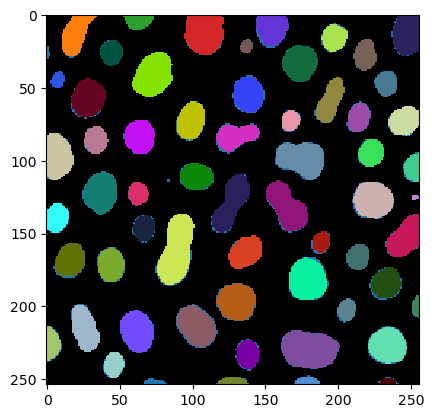

In [3]:
# Load image
blobs = imread('../../data/blobs.tif')

# labeling
label_image = watershed_otsu_labeling(blobs)

# visualization
cle.imshow(label_image, labels=True)

## Measurements/ region properties

We are now using the very handy function `label_statistics` which provides a table of features. Let us check first what we need to provide for this function:

In [4]:
label_statistics?

Signature:
label_statistics(
    intensity_image: 'napari.types.ImageData',
    label_image: 'napari.types.LabelsData',
    size: bool = True,
    intensity: bool = True,
    perimeter: bool = False,
    shape: bool = False,
    position: bool = False,
    moments: bool = False,
    napari_viewer: 'napari.Viewer' = None,
) -> 'pandas.DataFrame'
Docstring:
Measure intensity/shape/... statistics per label

Parameters
----------
intensity_image: ndarray, optional
    Can be None
label_image: ndarray
    Must be subsequently labeled
size: bool, optional
intensity: bool, optional
perimeter: bool, optional
shape: bool, optional
position: bool, optional
moments: bool, optional
napari_viewer: napari.Viewer, optional

Returns
-------
pandas DataFrame, in case napari_viewr is None, otherwise the DataFrame will be added to
the passed label_image's layer.features


See Also
--------
..[0] https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1LabelShapeStatisticsImageFilter
..[1] http://i

Feature categories which have are set to `True` are measured by default. In this case, the categories are `size` and `intensity`. But the rest might be also interesting to investigate. So we need them to `True` as well:

In [5]:
dataframe = pd.DataFrame(label_statistics(blobs, label_image,  
                              shape=True, 
                              perimeter=True, 
                              position=True,
                              moments=True))

dataframe

,label,maximum,mean,median,minimum,sigma,sum,variance,bbox_0,bbox_1,...,number_of_pixels_on_border,perimeter,perimeter_on_border,perimeter_on_border_ratio,principal_axes0,principal_axes1,principal_axes2,principal_axes3,principal_moments0,principal_moments1
0,1,224.0,137.526132,136.0,112.0,13.360739,157880.0,178.509343,0,0,...,36,2461.579651,36.0,0.014625,-0.574118,-0.818773,0.818773,-0.574118,5063.911496,5560.184284
1,2,232.0,193.014354,200.0,128.0,28.559077,80680.0,815.620897,11,0,...,16,85.499572,16.0,0.187135,0.902494,0.430703,-0.430703,0.902494,17.056706,72.884853
2,3,224.0,179.846995,184.0,128.0,21.328889,32912.0,454.921516,53,0,...,21,53.456120,21.0,0.392846,-0.042759,-0.999085,0.999085,-0.042759,8.637199,27.432794
3,4,248.0,207.082171,216.0,120.0,27.772832,133568.0,771.330194,95,0,...,23,93.409370,23.0,0.246228,0.991601,0.129334,-0.129334,0.991601,48.975064,55.851742
4,5,248.0,223.146402,232.0,128.0,30.246515,89928.0,914.851647,144,0,...,19,74.218143,19.0,0.256002,0.974707,0.223487,-0.223487,0.974707,32.059800,33.765222
5,6,248.0,214.906725,224.0,128.0,26.386796,99072.0,696.263020,238,0,...,39,80.787183,40.0,0.495128,0.999408,0.034407,-0.034407,0.999408,23.320204,59.820502
6,7,248.0,211.565891,224.0,136.0,30.197236,54584.0,911.873073,189,7,...,0,57.938471,0.0,0.000000,0.932037,0.362364,-0.362364,0.932037,18.705896,22.720115
7,8,200.0,166.171429,168.0,136.0,16.466894,11632.0,271.158592,133,17,...,0,29.917295,0.0,0.000000,0.960385,0.278678,-0.278678,0.960385,4.741825,6.584094
8,9,224.0,176.932331,176.0,128.0,24.022064,47064.0,577.059555,211,17,...,0,59.834590,0.0,0.000000,0.997651,0.068495,-0.068495,0.997651,14.969363,30.395186
9,10,240.0,191.598174,200.0,128.0,28.239851,41960.0,797.489171,37,18,...,0,53.360835,0.0,0.000000,0.992904,0.118917,-0.118917,0.992904,15.331341,19.871929


These are all columns that are available:

In [7]:
print(dataframe.keys())

Index(['label', 'maximum', 'mean', 'median', 'minimum', 'sigma', 'sum',
       'variance', 'bbox_0', 'bbox_1', 'bbox_2', 'bbox_3', 'centroid_0',
       'centroid_1', 'elongation', 'feret_diameter', 'flatness', 'roundness',
       'equivalent_ellipsoid_diameter_0', 'equivalent_ellipsoid_diameter_1',
       'equivalent_spherical_perimeter', 'equivalent_spherical_radius',
       'number_of_pixels', 'number_of_pixels_on_border', 'perimeter',
       'perimeter_on_border', 'perimeter_on_border_ratio', 'principal_axes0',
       'principal_axes1', 'principal_axes2', 'principal_axes3',
       'principal_moments0', 'principal_moments1'],
      dtype='object')


In [9]:
dataframe.describe()

,label,maximum,mean,median,minimum,sigma,sum,variance,bbox_0,bbox_1,...,number_of_pixels_on_border,perimeter,perimeter_on_border,perimeter_on_border_ratio,principal_axes0,principal_axes1,principal_axes2,principal_axes3,principal_moments0,principal_moments1
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,30.500000,236.000000,194.966598,200.800000,130.000000,26.069709,71696.933333,693.962389,123.516667,110.200000,...,5.683333,107.224145,5.700000,0.089574,0.696028,-0.138186,0.138186,0.696028,104.628848,134.931776
std,17.464249,14.012101,16.394414,19.579304,7.456086,3.817798,41465.329504,183.657670,81.460709,76.672493,...,10.255204,309.846236,10.310929,0.161164,0.476871,0.526743,0.526743,0.476871,651.200133,712.958883
min,1.000000,176.000000,137.526132,136.000000,112.000000,13.360739,2576.000000,178.509343,0.000000,0.000000,...,0.000000,14.843629,0.000000,0.000000,-0.653319,-0.999978,-0.653870,-0.653319,1.046852,1.755916
25%,15.750000,232.000000,188.713774,192.000000,128.000000,24.472535,40604.000000,598.904954,52.500000,42.750000,...,0.000000,53.221995,0.000000,0.000000,0.649215,-0.663517,-0.279282,0.649215,12.841678,22.351873
50%,30.500000,240.000000,195.937410,200.000000,128.000000,26.409917,71016.000000,697.484271,127.000000,108.500000,...,0.000000,68.482144,0.000000,0.000000,0.952820,0.026675,-0.026675,0.952820,18.738377,35.597627
75%,45.250000,248.000000,204.627083,210.000000,136.000000,28.649791,99386.000000,820.810634,201.500000,168.750000,...,11.250000,83.278130,11.250000,0.142182,0.989550,0.279282,0.663517,0.989550,29.329379,56.857478
max,60.000000,248.000000,229.430657,248.000000,152.000000,32.682072,172424.000000,1068.117840,251.000000,250.000000,...,39.000000,2461.579651,40.000000,0.495128,0.999988,0.653870,0.999978,0.999988,5063.911496,5560.184284


## Specific measures
SimpleITK offers some non-standard measurements which deserve additional documentation

### `number_of_pixels_on_border`

First, we check its range on the above example image.

In [15]:
number_of_pixels_on_border = dataframe['number_of_pixels_on_border'].tolist()
np.min(number_of_pixels_on_border), np.max(number_of_pixels_on_border)

(0, 39)

Next, we visualize the measurement in space.

cl.OCLArray([[ 0.,  0.,  0., ..., 39., 39., 39.],
       [ 0.,  0.,  0., ..., 39., 39., 39.],
       [ 0.,  0.,  0., ..., 39., 39., 39.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)
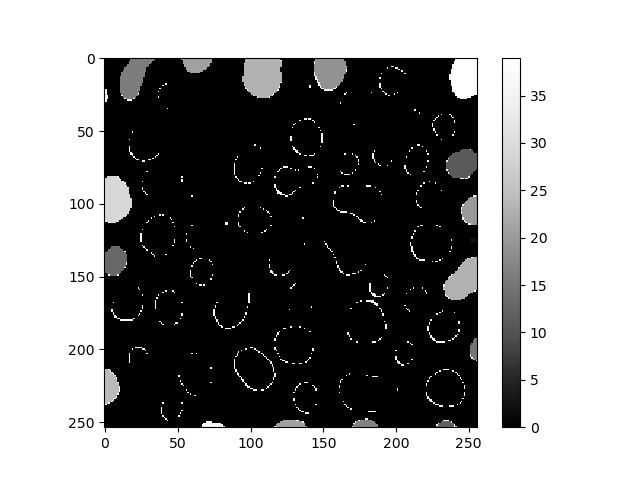
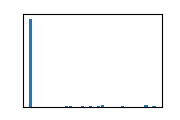

In [16]:
number_of_pixels_on_border_map = cle.replace_intensities(label_image, [0] + number_of_pixels_on_border)
number_of_pixels_on_border_map

The visualization suggests that `number_of_pixels_on_border` is the count of pixels within a label that is located at the image border.

### `perimeter_on_border`

cl.OCLArray([[ 0.,  0.,  0., ..., 40., 40., 40.],
       [ 0.,  0.,  0., ..., 40., 40., 40.],
       [ 0.,  0.,  0., ..., 40., 40., 40.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)
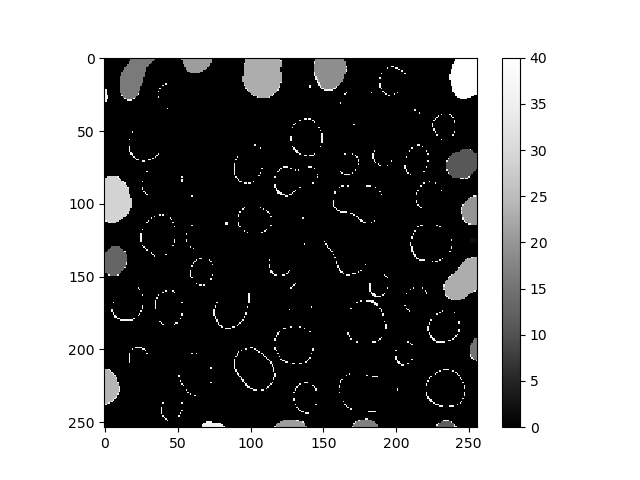
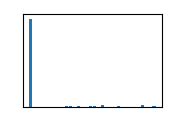

In [17]:
perimeter_on_border = dataframe['perimeter_on_border'].tolist()
np.min(perimeter_on_border), np.max(perimeter_on_border)

perimeter_on_border_map = cle.replace_intensities(label_image, [0] + perimeter_on_border)
perimeter_on_border_map

The visualization suggests that `perimeter_on_border` is the perimeter of labels that are located at the image border.

### `perimeter_on_border_ratio`

In this context, the [SimpleITK documentation]() points to a [publication](https://www.insight-journal.org/browse/publication/176) which mentiones "'SizeOnBorder' is the number of pixels in the objects which are on the border of the image." While the documentation is wage, the `perimeter_on_border_ratio` may be related.

cl.OCLArray([[0.        , 0.        , 0.        , ..., 0.49512804, 0.49512804,
        0.49512804],
       [0.        , 0.        , 0.        , ..., 0.49512804, 0.49512804,
        0.49512804],
       [0.        , 0.        , 0.        , ..., 0.49512804, 0.49512804,
        0.49512804],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)
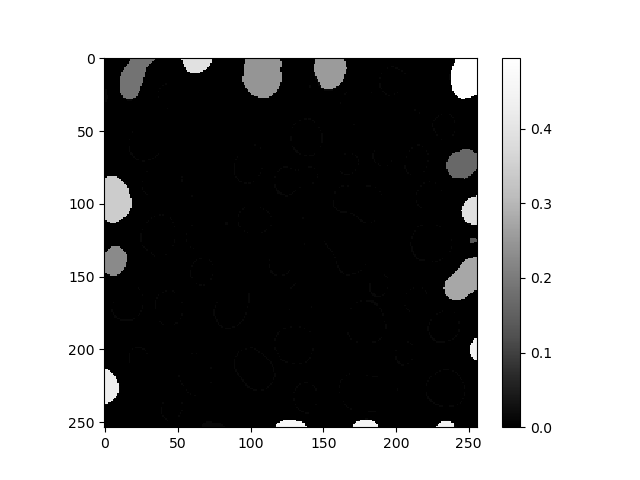
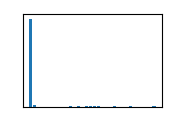

In [21]:
perimeter_on_border_ratio = dataframe['perimeter_on_border_ratio'].tolist()
np.min(perimeter_on_border_ratio), np.max(perimeter_on_border_ratio)

perimeter_on_border_ratio_map = cle.replace_intensities(label_image, [0] + perimeter_on_border_ratio)
perimeter_on_border_ratio_map

The visualization reinforces our assumption that the `perimeter_on_border_ratio` indeed is related to the amount the object touches the image border.

### `principal axes`

In our example, we have `principal_axes0` - `principal_axes3`

cl.OCLArray([[0.        , 0.        , 0.        , ..., 0.99940795, 0.99940795,
        0.99940795],
       [0.        , 0.        , 0.        , ..., 0.99940795, 0.99940795,
        0.99940795],
       [0.        , 0.        , 0.        , ..., 0.99940795, 0.99940795,
        0.99940795],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)
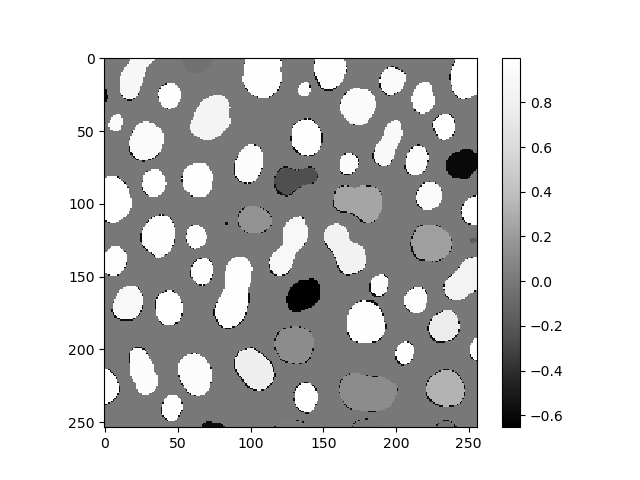
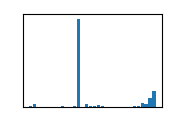

In [23]:
principal_axes_0 = dataframe['principal_axes0'].tolist()
np.min(principal_axes_0), np.max(principal_axes_0)

principal_axes_0_map = cle.replace_intensities(label_image, [0] + principal_axes_0)
principal_axes_0_map

(`principal_axes3` looks the same)

cl.OCLArray([[0.        , 0.        , 0.        , ..., 0.03440651, 0.03440651,
        0.03440651],
       [0.        , 0.        , 0.        , ..., 0.03440651, 0.03440651,
        0.03440651],
       [0.        , 0.        , 0.        , ..., 0.03440651, 0.03440651,
        0.03440651],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)
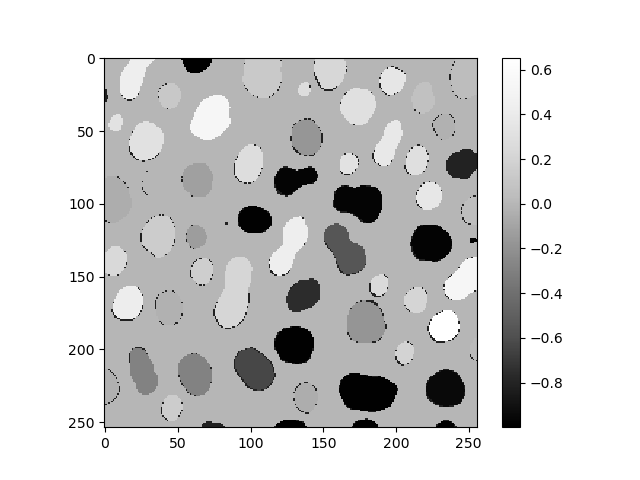
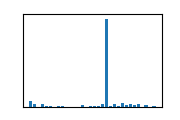

In [25]:
principal_axes_1 = dataframe['principal_axes1'].tolist()
np.min(principal_axes_1), np.max(principal_axes_1)

principal_axes_1_map = cle.replace_intensities(label_image, [0] + principal_axes_1)
principal_axes_1_map

cl.OCLArray([[ 0.        ,  0.        ,  0.        , ..., -0.03440651,
        -0.03440651, -0.03440651],
       [ 0.        ,  0.        ,  0.        , ..., -0.03440651,
        -0.03440651, -0.03440651],
       [ 0.        ,  0.        ,  0.        , ..., -0.03440651,
        -0.03440651, -0.03440651],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)
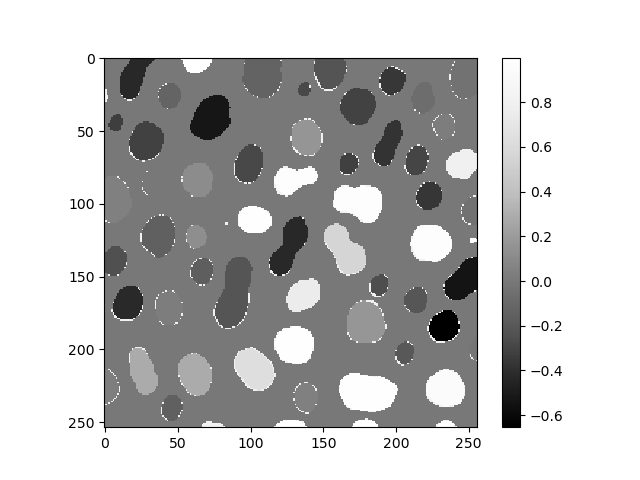
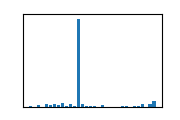

In [26]:
principal_axes_2 = dataframe['principal_axes2'].tolist()
np.min(principal_axes_2), np.max(principal_axes_2)

principal_axes_2_map = cle.replace_intensities(label_image, [0] + principal_axes_2)
principal_axes_2_map

### `principal moments`

cl.OCLArray([[ 0.      ,  0.      ,  0.      , ..., 23.320204, 23.320204,
        23.320204],
       [ 0.      ,  0.      ,  0.      , ..., 23.320204, 23.320204,
        23.320204],
       [ 0.      ,  0.      ,  0.      , ..., 23.320204, 23.320204,
        23.320204],
       ...,
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ]], dtype=float32)
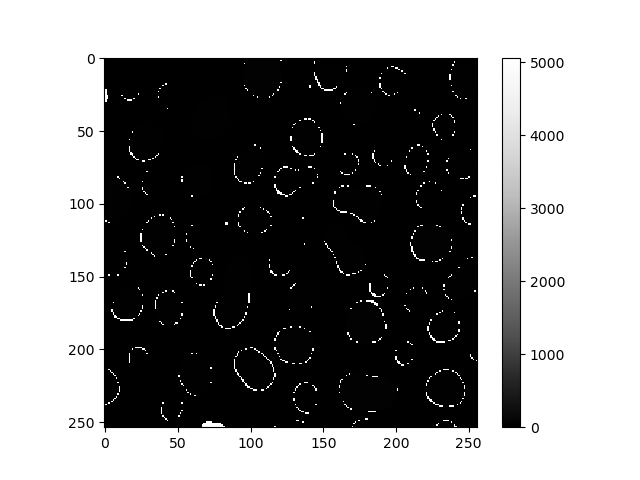
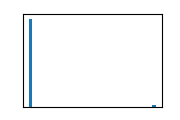

In [27]:
principal_moments_0 = dataframe['principal_moments0'].tolist()
np.min(principal_moments_0), np.max(principal_moments_0)

principal_moments_0_map = cle.replace_intensities(label_image, [0] + principal_moments_0)
principal_moments_0_map

cl.OCLArray([[ 0.      ,  0.      ,  0.      , ..., 59.820503, 59.820503,
        59.820503],
       [ 0.      ,  0.      ,  0.      , ..., 59.820503, 59.820503,
        59.820503],
       [ 0.      ,  0.      ,  0.      , ..., 59.820503, 59.820503,
        59.820503],
       ...,
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ]], dtype=float32)
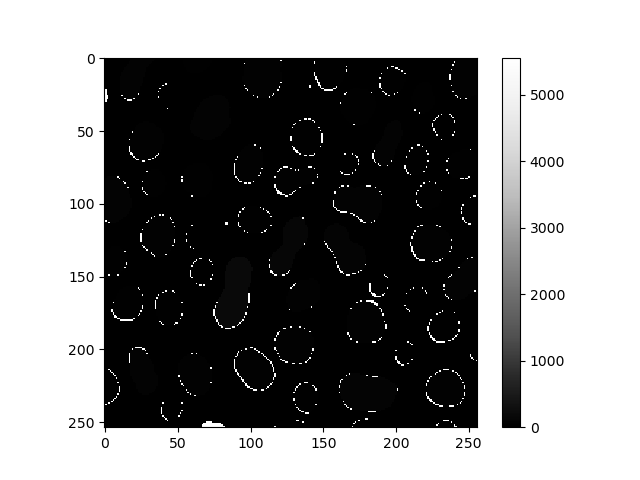
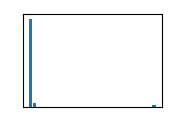

In [28]:
principal_moments_1 = dataframe['principal_moments1'].tolist()
np.min(principal_moments_1), np.max(principal_moments_1)

principal_moments_1_map = cle.replace_intensities(label_image, [0] + principal_moments_1)
principal_moments_1_map

## Exercises